<a href="https://colab.research.google.com/github/pachterlab/Clytia_single_cell_2020/blob/master/notebooks/exploreCufflinksData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!date

Thu Nov  5 02:05:27 UTC 2020


In [3]:
!wget --quiet https://caltech.box.com/shared/static/qvek1so488xvfxx0ahldrfetfzvw603d


In [2]:
!pip install --quiet anndata
!pip install --quiet scanpy

     |████████████████████████████████| 122kB 3.4MB/s 
     |████████████████████████████████| 7.7MB 2.8MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 


In [4]:
#Install Packages
import random
import pandas as pd
import anndata
import scanpy as sc
import numpy as np
import scipy.sparse

import warnings
warnings.filterwarnings('ignore')

#import scrublet as scr

import matplotlib.pyplot as plt
%matplotlib inline
sc.set_figure_params(dpi=125)

import seaborn as sns
sns.set(style="whitegrid")

In [5]:
#Read in data
jelly_adata = anndata.read('qvek1so488xvfxx0ahldrfetfzvw603d')
jelly_adata

AnnData object with n_obs × n_vars = 13673 × 9609
    obs: 'batch', 'orgID', 'fed', 'starved', 'cellRanger_louvain', 'n_counts', 'n_countslog'
    var: 'n_counts', 'mean', 'std'
    uns: 'cellRanger_louvain_colors', 'cellRanger_louvain_sizes', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
#Add dendrogram
sc.tl.dendrogram(jelly_adata,'cellRanger_louvain',linkage_method='ward')
jelly_adata.uns['dendrogram_cellRanger_louvain'] = jelly_adata.uns["dendrogram_['cellRanger_louvain']"]

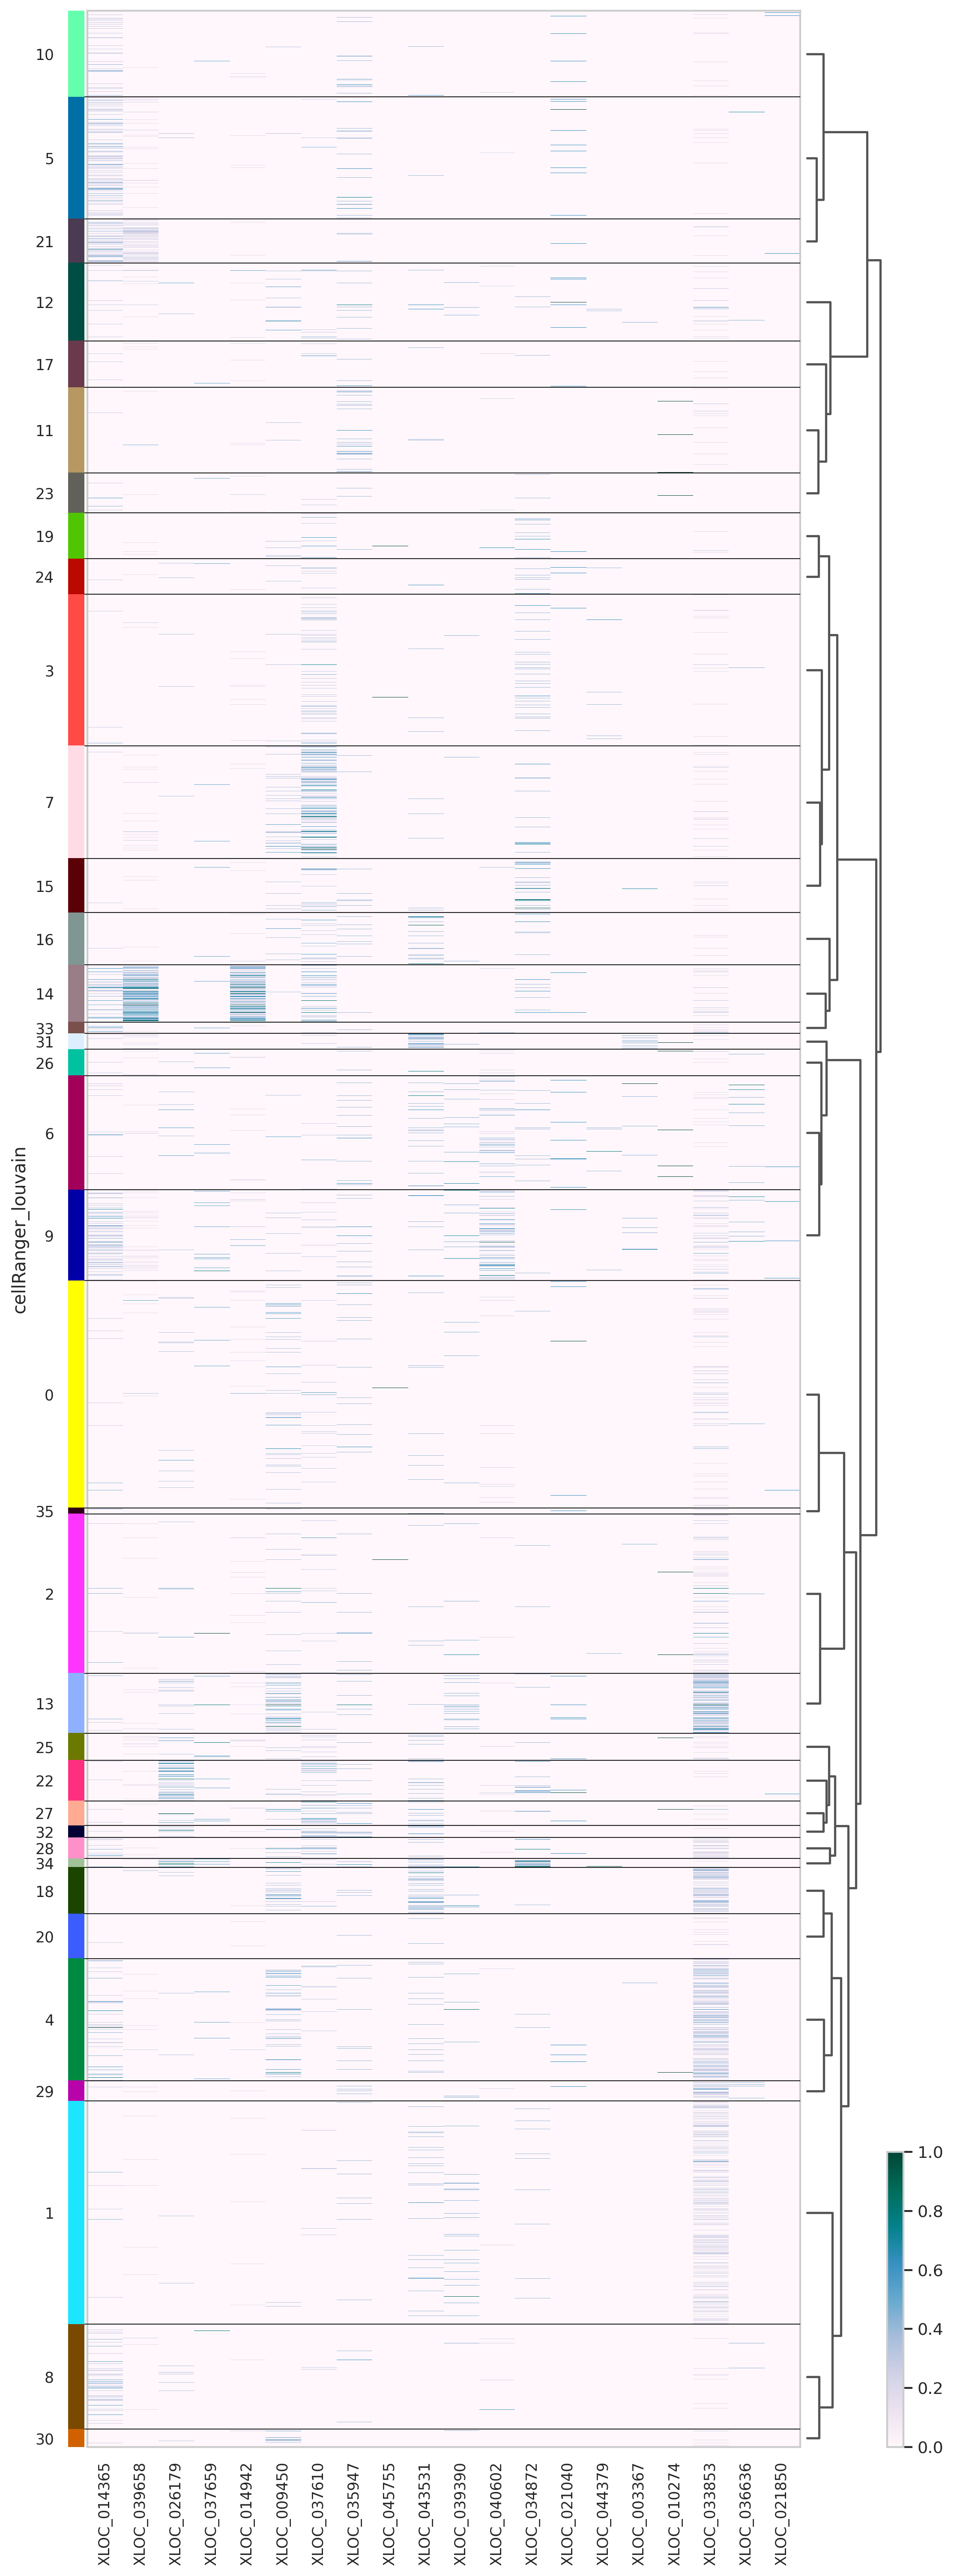

In [12]:
#Plot genes of interest on heatmap
jelly_adata.obs['cellRanger_louvain'] = pd.Categorical(jelly_adata.obs['cellRanger_louvain'])
#Example genes list
genes = ['XLOC_014365','XLOC_039658','XLOC_026179','XLOC_037659','XLOC_014942','XLOC_009450','XLOC_037610','XLOC_035947',
 'XLOC_045755','XLOC_043531','XLOC_039390','XLOC_040602','XLOC_034872','XLOC_021040','XLOC_044379',
 'XLOC_003367','XLOC_010274','XLOC_033853','XLOC_036636','XLOC_021850']

sc.pl.heatmap(jelly_adata, genes, groupby='cellRanger_louvain',dendrogram=True, show_gene_labels=True,swap_axes=False,figsize = (10,30),
              cmap='PuBuGn',standard_scale='var')






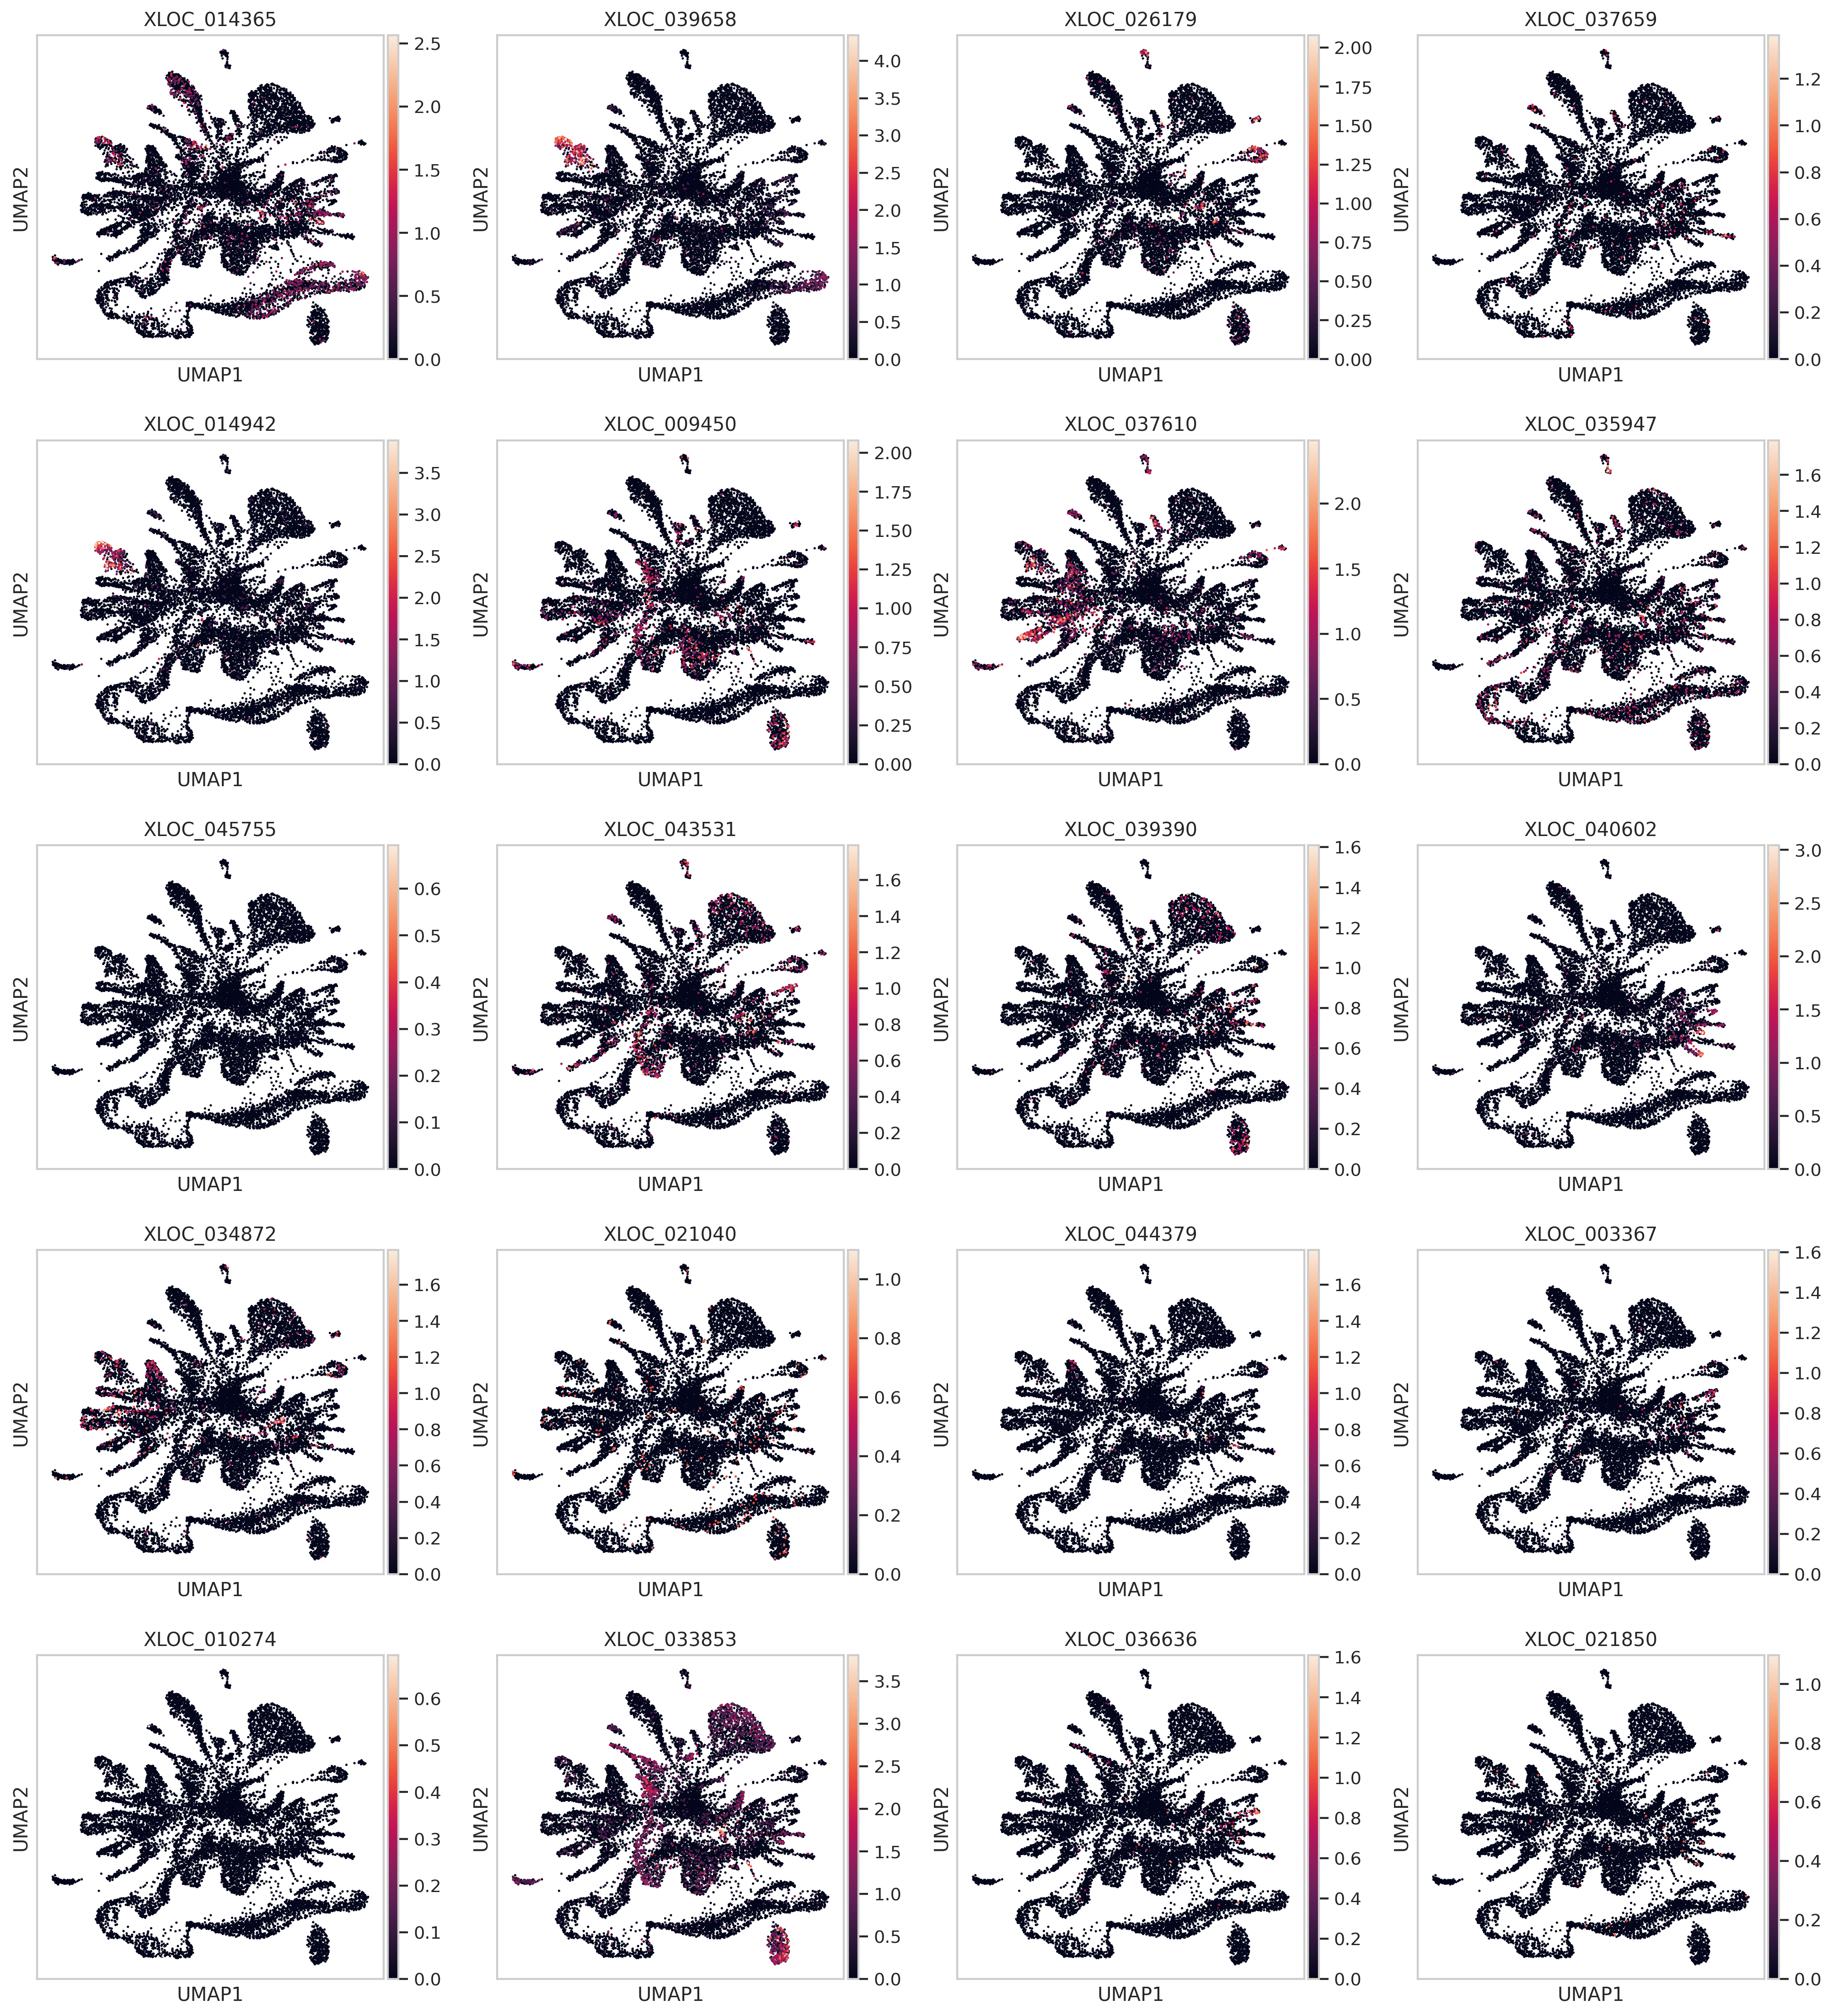

In [13]:
#Plot genes of interest on cell atlas embedding

sc.pl.umap(jelly_adata,color=genes)